#Librerias

In [ ]:
pip install pandas_summary

In [ ]:
pip install isoweek

In [ ]:
pip install pyarrow

In [ ]:
import pandas as pd
from pandas_summary import DataFrameSummary

import numpy as np
import datetime
from isoweek import Week

from pandas_summary import DataFrameSummary
from sklearn.preprocessing import LabelEncoder, StandardScaler

import datetime

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

from sklearn.feature_selection import SelectKBest

from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


#Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data

In [ ]:
PATH = '/content/drive/MyDrive/Redes TPS/TP2/data/'
table_names = ['train', 'test', 'store', 'store_states', 'state_names', 'googletrend', 'weather']
train, test, store, store_states, state_names, googletrend, weather = dfs = [pd.read_csv(PATH + fname+'.csv', 
                                                                      low_memory=False) for fname in table_names]

## Train/Test

Las tablas "train" y "test" cuentan con los siguientes parametros:

* Store(int): Tienda identificada por un numero unico.
* DayOfWeek(int): Numero del dia de la semana. Es una variable categorica, cada uno representa un dia de la semana.
* Date(str): La fecha en la que se realizaron las compras indicadas "Sales". 
* Sales(int): Cantidad de compras realizadas en la fecha y tienda indicada.
* Customers(int): Cantidad de clientes en esa tienda para esa fecha.
* Open(int): es una variable dicotomica booleana que indica 0 si la tienda se encuentra cerrada para esa fecha y 1 si se encuentra abierta.
* Promo(int): es una variable dicotomica booleana que indica 0 si la tienda no tiene promo en esa fecha y 1 si sí la tiene.
* StateHoliday(str): es una variable categorica que puede tomar los siguientes valores: a(feriado publico), b(pascuas), c(navidad) o 0(no es feriado).
* SchoolHoliday(int): es una variable dicotomica booleana que indica 0 si no hay feriado escolar en esa fecha y 1 si sí lo hay. 

A traves del summary podemos ver que no hay datos faltantes en la tabla y que cuenta con 1017209 registros.




In [ ]:
headers_train = train.columns
print("Tipos de datos:")
for i in range(len(headers_train)):
  print(headers_train[i], type(train.iloc[0][headers_train[i]]))

Tipos de datos:
Store <class 'numpy.int64'>
DayOfWeek <class 'numpy.int64'>
Date <class 'str'>
Sales <class 'numpy.int64'>
Customers <class 'numpy.int64'>
Open <class 'numpy.int64'>
Promo <class 'numpy.int64'>
StateHoliday <class 'str'>
SchoolHoliday <class 'numpy.int64'>


In [ ]:
display(train.head())
display(DataFrameSummary(train).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056
min,1,1,NaN,0,0,0,0,NaN,0
25%,280,2,NaN,3727,405,1,0,NaN,0
50%,558,4,NaN,5744,609,1,0,NaN,0
75%,838,6,NaN,7856,837,1,1,NaN,0
max,1115,7,NaN,41551,7388,1,1,NaN,1
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


##Store

La tabla "store" cuenta con los siguientes parametros:


* Store(int): Tienda identificada por un numero unico. Esta variable se correlaciona con la variable "store" de las tablas "train" y "test".
* StoreType(str): Es una variable categorica que clasifica las tiendas en a, b, c o d.
* Assortment(str): Es una variable categorica que clasifica la variedad de las tiendas en a (basico), b (extra) o c (extendida).
* CompetitionDistance(float): Es la distancia en metros a la tienda del competidor más cercano.
* CompetitionOpenSinceMonth(float): Es el tiempo en meses desde que la tienda del competidor más cercano abrió.
* CompetitionOpenSinceYear(float): Es el tiempo en años desde que la tienda del competidor más cercano abrió.
* Promo2(int): Hace referencia si la tienda tiene una promo continua. Es una variable dicotomica booleana que indica 0 si la tienda no participa de este tipo de promoción y 1 si si lo hace.
* Promo2SinceWeek(float): Es el tiempo en semanas desde que la tienda participa de la promo2.
* Promo2SinceYear(float): Es el tiempo en años desde que la tienda participa de la promo2.
* **PromoInterval(float):** Indica el intervalo en donde se inicia la promo2. Por ejemplo: "Feb,May,Aug,Nov".

A traves del summary podemos ver que hay datos faltantes para ciertas variables y que cuenta con 1115 registros.



In [ ]:
headers_store = store.columns
print("Tipos de datos:")
for i in range(len(headers_store)):
  print(headers_store[i], type(store.iloc[0][headers_store[i]]))

Tipos de datos:
Store <class 'numpy.int64'>
StoreType <class 'str'>
Assortment <class 'str'>
CompetitionDistance <class 'numpy.float64'>
CompetitionOpenSinceMonth <class 'numpy.float64'>
CompetitionOpenSinceYear <class 'numpy.float64'>
Promo2 <class 'numpy.int64'>
Promo2SinceWeek <class 'numpy.float64'>
Promo2SinceYear <class 'numpy.float64'>
PromoInterval <class 'float'>


In [ ]:
display(store.head())
display(DataFrameSummary(store).summary())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,NaN,NaN,1112,761,761,1115,571,571,NaN
mean,558,NaN,NaN,5404.9,7.2247,2008.67,0.512108,23.5954,2011.76,NaN
std,322.017,NaN,NaN,7663.17,3.21235,6.19598,0.500078,14.142,1.67494,NaN
min,1,NaN,NaN,20,1,1900,0,1,2009,NaN
25%,279.5,NaN,NaN,717.5,4,2006,0,13,2011,NaN
50%,558,NaN,NaN,2325,8,2010,1,22,2012,NaN
75%,836.5,NaN,NaN,6882.5,10,2013,1,37,2013,NaN
max,1115,NaN,NaN,75860,12,2015,1,50,2015,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


## Store States

La tabla "store_states" cuenta con los siguientes parametros:


* Store(int): Tienda identificada por un numero unico. Esta variable se correlaciona con la variable "store" de las tablas "train" y "test" y "store".
* State(str): Indica con 2 letras los estados de Alemania donde se encuentran las tiendas.


A traves del summary podemos ver que no hay datos faltantes para ciertas variables y que cuenta con 1115 registros.


In [ ]:
headers_store_states = store_states.columns
print("Tipos de datos:")
for i in range(len(headers_store_states)):
  print(headers_store_states[i], type(store_states.iloc[0][headers_store_states[i]]))

Tipos de datos:
Store <class 'numpy.int64'>
State <class 'str'>


In [ ]:
display(store_states.head())
display(DataFrameSummary(store_states).summary())

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,Store,State
count,1115,NaN
mean,558,NaN
std,322.017,NaN
min,1,NaN
25%,279.5,NaN
50%,558,NaN
75%,836.5,NaN
max,1115,NaN
counts,1115,1115
uniques,1115,12


## State Names

La tabla "state_names" cuenta con los siguientes parametros:


* StateName(str): Indica el nombre de los estados de Alemania donde se encuentran las tiendas.
* State(str): Indica con 2 letras los estados de Alemania donde se encuentran las tiendas. Esta variable se correlaciona con la variable "state" de la tabla "store_states".

A traves del summary podemos ver que no hay datos faltantes para ciertas variables y que cuenta con 16 registros.

In [ ]:
headers_state_names = state_names.columns
print("Tipos de datos:")
for i in range(len(headers_state_names)):
  print(headers_state_names[i], type(state_names.iloc[0][headers_state_names[i]]))

Tipos de datos:
StateName <class 'str'>
State <class 'str'>


In [ ]:
display(state_names)
display(DataFrameSummary(state_names).summary())

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB
5,Hamburg,HH
6,Hessen,HE
7,MecklenburgVorpommern,MV
8,Niedersachsen,"HB,NI"
9,NordrheinWestfalen,NW


,StateName,State
count,16,16
unique,16,16
top,Berlin,SL
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


## Google Trend

La tabla "googletrend" cuenta con los siguientes parametros:


* file(str): Identifica a las tiendas con el nombre "Rossmann_DE_" seguido de las dos letras que identifican el estado de Alemania donde se encuentra la tienda(variable "state" de "store_states").
* week(str): Indica las fecha de inicio y fin de la semana para la cual se mira el trend de busqueda de google de esa tienda.
* trend(int): Es el numero de busquedas en google de la tienda indicada.

A traves del summary podemos ver que no hay datos faltantes para ciertas variables y que cuenta con 2072 registros.

In [ ]:
headers_googletrend = googletrend.columns
print("Tipos de datos:")
for i in range(len(headers_googletrend)):
  print(headers_googletrend[i], type(googletrend.iloc[0][headers_googletrend[i]]))

Tipos de datos:
file <class 'str'>
week <class 'str'>
trend <class 'numpy.int64'>


In [ ]:
display(googletrend.head())
display(DataFrameSummary(googletrend).summary())

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,file,week,trend
count,NaN,NaN,2072
mean,NaN,NaN,63.8142
std,NaN,NaN,12.6502
min,NaN,NaN,0
25%,NaN,NaN,55
50%,NaN,NaN,64
75%,NaN,NaN,72
max,NaN,NaN,100
counts,2072,2072,2072
uniques,14,148,68


## Weather

La tabla "weather" cuenta con los siguientes parametros:


* file(str):  Indica el nombre de los estados de Alemania donde se encuentran las tiendas. Esta se correlaciona con la variable "StateNames" de la tabla "state_names".
* Date(str): Indica la fecha de para la cual se mide el clima.
* Max_TemperatureC(int): Indica la máxima temperatura en grados Celsius para la fecha y el estado dado.
* Mean_TemperatureC(int): Indica la media de la temperatura en grados Celsius para la fecha y el estado dado.
* Min_TemperatureC(int): Indica la mínima temperatura en grados Celsius para la fecha y el estado dado.
* Dew_PointC(int): Indica el punto de rocío en grados Celsius para la fecha y el estado dado.
* MeanDew_PointC(int): Indica el promedio del punto de rocío en grados Celsius para la fecha y el estado dado.
* Min_DewpointC(int): Indica el mínimo punto de rocío en grados Celsius para la fecha y el estado dado.
* Max_Humidity(int): Indica la humedad máxima para la fecha y el estado dado.
* Mean_Humidity(int): Indica la humedad promedio para la fecha y el estado dado.
* Min_Humidity(int): Indica la humedad mínima para la fecha y el estado dado.
* Max_Sea_Level_PressurehPa(int): Indica la máxima presion a nivel del mar en hectopascales para la fecha y el estado dado.
* Mean_Sea_Level_PressurehPa(int): Indica el promedio de la presion a nivel del mar en hectopascales para la fecha y el estado dado.
* Min_Sea_Level_PressurehPa(int): Indica la mínima presion a nivel del mar en hectopascales para la fecha y el estado dado.
* Max_VisibilityKm(float): Indica la máxima visibilidad en kilometros para la fecha y el estado dado.
* Mean_VisibilityKm(float): Indica la visibilidad promedio en kilometros para la fecha y el estado dado.
* Min_VisibilitykM(float): Indica la mínima visibilidad en kilometros para la fecha y el estado dado.
* Max_Wind_SpeedKm_h(int): Indica la máxima velocidad del viento en kilometros por hora para la fecha y el estado dado.
* Mean_Wind_SpeedKm_h(int): Indica la velocidad del viento promedio en kilometros por hora para la fecha y el estado dado.
* Max_Gust_SpeedKm_h(float): Indica la máxima velocidad de ráfaga del viento en kilometros por hora para la fecha y el estado dado.
* Precipitationmm(float): Indica la precipitación en milimetros para la fecha y el estado dado.
* CloudCover(float): Indica la nubosidad para la fecha y el estado dado.
* Events(str): Indica eventos climaticos.
* WindDirDegrees(int): Indica la dirección del viento en grados para la fecha y el estado dado.

A traves del summary podemos ver que hay datos faltantes para ciertas variables y que cuenta con 15840 registros.

In [ ]:
headers_weather = weather.columns
print("Tipos de datos:")
for i in range(len(headers_weather)):
  print(headers_weather[i], type(weather.iloc[0][headers_weather[i]]))

Tipos de datos:
file <class 'str'>
Date <class 'str'>
Max_TemperatureC <class 'numpy.int64'>
Mean_TemperatureC <class 'numpy.int64'>
Min_TemperatureC <class 'numpy.int64'>
Dew_PointC <class 'numpy.int64'>
MeanDew_PointC <class 'numpy.int64'>
Min_DewpointC <class 'numpy.int64'>
Max_Humidity <class 'numpy.int64'>
Mean_Humidity <class 'numpy.int64'>
Min_Humidity <class 'numpy.int64'>
Max_Sea_Level_PressurehPa <class 'numpy.int64'>
Mean_Sea_Level_PressurehPa <class 'numpy.int64'>
Min_Sea_Level_PressurehPa <class 'numpy.int64'>
Max_VisibilityKm <class 'numpy.float64'>
Mean_VisibilityKm <class 'numpy.float64'>
Min_VisibilitykM <class 'numpy.float64'>
Max_Wind_SpeedKm_h <class 'numpy.int64'>
Mean_Wind_SpeedKm_h <class 'numpy.int64'>
Max_Gust_SpeedKm_h <class 'numpy.float64'>
Precipitationmm <class 'numpy.float64'>
CloudCover <class 'numpy.float64'>
Events <class 'str'>
WindDirDegrees <class 'numpy.int64'>


In [ ]:
display(weather.head())
display(DataFrameSummary(weather).summary())

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,65,1013,1005,1001,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,78,1028,1022,1014,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,77,1035,1030,1026,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,87,1036,1035,1034,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,87,1035,1034,1033,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15459,15459,15459,15840,15840,3604,15840,14667,NaN,15840
mean,NaN,NaN,14.6441,10.389,6.19899,8.58782,6.20581,3.62614,93.6596,74.2829,50.1586,1018.53,1015.3,1012.31,24.0576,12.2398,7.02516,22.7666,11.9722,48.8643,0.831718,5.55131,NaN,175.897
std,NaN,NaN,8.64601,7.37926,6.52639,6.24478,6.08677,6.12839,7.67853,13.4866,19.9602,7.78872,8.12331,8.60058,8.9768,5.06794,4.9806,8.98862,5.87284,13.027,2.51351,1.68771,NaN,101.589
min,NaN,NaN,-11,-13,-15,-14,-15,-73,44,30,4,976,974,970,0,0,0,3,2,21,0,0,NaN,-1
25%,NaN,NaN,8,4,1,4,2,-1,90.75,65,34,1014,1010,1007,14,10,3,16,8,39,0,5,NaN,80
50%,NaN,NaN,15,11,7,9,7,4,94,76,49,1019,1016,1013,31,11,7,21,11,48,0,6,NaN,202
75%,NaN,NaN,21,16,11,13,11,8,100,85,66,1024,1021,1018,31,14,10,27,14,55,0.25,7,NaN,256
max,NaN,NaN,39,31,24,25,20,19,100,100,100,1043,1040,1038,31,31,31,101,53,111,58.93,8,NaN,360
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,93,67,67,69,24,32,24,44,29,47,41,9,21,362


#Preprocesamiento

## Datos faltantes

In [ ]:
def get_missing_columns(df):
    return list(df.columns[df.describe(include = 'all').loc['count']<len(df)])

In [ ]:
#nos fijamos para todas las tablas para que variables hay datos faltantes
for i, df in enumerate(dfs):
    print(table_names[i], get_missing_columns(df))

train []
test ['Open']
store ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store_states []
state_names []
googletrend []
weather ['Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'CloudCover', 'Events']


### Test - 'Open'

In [ ]:
#vemos para que tienda y para que dia test tiene datos NaN en la variable "Open"
print("Las tiendas con datos NaN son:",np.unique(test.loc[test['Open'].isnull(),'Store'].tolist()))
print("Los dias de la semana con datos NaN son:",np.unique(test.loc[test['Open'].isnull(),'Store'].tolist()))

Las tiendas con datos NaN son: [622]
Los dias de la semana con datos NaN son: [622]


In [ ]:
#vemos los datos para la tienda de id 622, ques es la unica que presenta datos faltantes
test[test['Store'] == 622]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
3903,3904,622,7,2015-09-13,0.0,0,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0


In [ ]:
#vemos que la tienda 622 se encuentra por lo general abierta los dias 1,2,3,4,5,6 y cerrada los dias 7
test.loc[test['Open'].isna(), 'Open'] = (test[test['Open'].isna()]['DayOfWeek'] != 7)*1.0

### Store

#### 'CompetitionDistance'

In [ ]:
#consideramos que si la distancia es NaN es que no tengo tienda competidora cercana
#cambiamos todos los NaN por la distancia maxima de la tabla
store.loc[store['CompetitionDistance'].isna(), 'CompetitionDistance'] = store['CompetitionDistance'].max()

####'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'

In [ ]:
#pongo todas las fechas que estan en NaN en el mes 1 del año 1990
#si las fechas son mas antiguas que 1990 tambien las pongo en el mes 1 de 1990
store.loc[store['CompetitionOpenSinceYear'].isna() | (store['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceYear'] = np.int32(1990)
store.loc[store['CompetitionOpenSinceMonth'].isna() | (store['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceMonth'] = np.int32(1)

In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


####'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'

In [ ]:
print("Veo si la Promo2 esta vigente para los casos NaN:")
print("Promo2SinceWeek",np.unique(store.loc[store['Promo2SinceWeek'].isnull(),'Promo2'].tolist()))
print("Promo2SinceYear",np.unique(store.loc[store['Promo2SinceYear'].isnull(),'Promo2'].tolist()))
print("PromoInterval",np.unique(store.loc[store['PromoInterval'].isnull(),'Promo2'].tolist()))

Veo si la Promo2 esta vigente para los casos NaN:
Promo2SinceWeek [0]
Promo2SinceYear [0]
PromoInterval [0]


In [ ]:
#al ser todos para cuando la promo2 no esta vigente, veo como se tratan esas variables
print("Cantidad de valores no NaN de las variables para Promo2 no vigente =",store.loc[store['Promo2']==0,['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].notnull().sum().sum())

Cantidad de valores no NaN de las variables para Promo2 no vigente = 0


In [ ]:
#como no hay un caso de promo2=0 con variables no NaN definimos nostras
#empieza en la fecha cero, mes 1 año 1990 y el intervalo es '-'
#(esto será tratado como categórica por eso tiene sentido()
store.loc[store['Promo2SinceWeek'].isna() & (store['Promo2'] == 0), 'Promo2SinceWeek'] = np.int32(1)
store.loc[store['Promo2SinceYear'].isna() & (store['Promo2'] == 0), 'Promo2SinceYear'] = np.int32(1990)
store.loc[store['PromoInterval'].isna() & (store['Promo2'] == 0), 'PromoInterval'] = '-'

### Weather - 'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'CloudCover', 'Events'

In [ ]:
#suponemos que son dias tranquilos 
#(de todas formas no se usaran para la predicción)
weather.loc[weather['Max_VisibilityKm'].isna(), 'Max_VisibilityKm'] = weather['Max_VisibilityKm'].max()
weather.loc[weather['Mean_VisibilityKm'].isna(), 'Mean_VisibilityKm'] = weather['Mean_VisibilityKm'].max()
weather.loc[weather['Min_VisibilitykM'].isna(), 'Min_VisibilitykM'] = weather['Min_VisibilitykM'].max()
weather.loc[weather['Max_Gust_SpeedKm_h'].isna(), 'Max_Gust_SpeedKm_h'] = weather['Max_Gust_SpeedKm_h'].min()
weather.loc[weather['CloudCover'].isna(), 'CloudCover'] = weather['CloudCover'].min()
weather.loc[weather['Events'].isna(), 'Events'] = 'Sunny'

## Acomodamos googletrend y creamos 'trend_de'

In [ ]:
#vemos la tabla
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [ ]:
#armamos una columna 'Date' con la primera fecha de 'week'
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]

In [ ]:
#armamos una columna 'State' con el nombre del estado que sacamos de las ultimas dos letras de 'file'
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]

In [ ]:
#vemos que estados quedaron en la tabla
pd.unique(googletrend['State'])

array(['SN', None, 'BY', 'TH', 'NW', 'BE', 'RP', 'BW', 'NI', 'SH', 'HE',
       'ST', 'HH', 'SL'], dtype=object)

In [ ]:
#comparamos con la tabla de 'state_names' para ver que sean iguales y despues poder hacer el join
pd.unique(state_names['State'])

array(['BW', 'BY', 'BE', 'BB', 'HB', 'HH', 'HE', 'MV', 'HB,NI', 'NW',
       'RP', 'SL', 'SN', 'ST', 'SH', 'TH'], dtype=object)

In [ ]:
#vemos que 'NI' en 'googletrend' es 'HB,NI' por lo que lo cambiamos a eso
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

In [ ]:
#vemos un valor 'None' en los estados, por lo que los vamos a ver en la tabla
googletrend.loc[googletrend['State'].isnull(),googletrend.columns]

,file,week,trend,Date,State
148,Rossmann_DE,2012-12-02 - 2012-12-08,77,2012-12-02,None
149,Rossmann_DE,2012-12-09 - 2012-12-15,76,2012-12-09,None
150,Rossmann_DE,2012-12-16 - 2012-12-22,85,2012-12-16,None
151,Rossmann_DE,2012-12-23 - 2012-12-29,59,2012-12-23,None
152,Rossmann_DE,2012-12-30 - 2013-01-05,61,2012-12-30,None
...,...,...,...,...,...
291,Rossmann_DE,2015-08-30 - 2015-09-05,78,2015-08-30,None
292,Rossmann_DE,2015-09-06 - 2015-09-12,71,2015-09-06,None
293,Rossmann_DE,2015-09-13 - 2015-09-19,77,2015-09-13,None
294,Rossmann_DE,2015-09-20 - 2015-09-26,67,2015-09-20,None


In [ ]:
#creamos una tabla donde ponemos estos valores con 'State' 'None' que son las tendencias generales de Alemania
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

## Fechas

### Creamos fechas 'CompetitionOpenSince', 'Promo2Since' en 'store'

In [ ]:
#pasamos los meses y años que estan en float a int
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(np.int32)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(np.int32)
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(np.int32)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(np.int32)

In [ ]:
#creamos la fecha 'CompetitionOpenSince' con el año y mes dados suponiendo que el dia es 15
store['CompetitionOpenSince'] = pd.to_datetime(store.apply(lambda x: datetime.datetime(
    x.CompetitionOpenSinceYear, x.CompetitionOpenSinceMonth, 15), axis=1))

In [ ]:
#creamos la fecha 'Promo2Since' con el año y semana dados suponiendo que el dia es lunes
store["Promo2Since"] = pd.to_datetime(store.apply(lambda x: Week(
    x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1))

### Separamos fechas para 'weather', 'googletrend', 'trend_de', 'train' y 'test'

In [ ]:
#definimos una funcion que nos genera 'Year', 'Month', 'Week' y 'Day'
def add_datepart(df):
  df.Date = pd.to_datetime(df.Date)
  df["Year"] = df.Date.dt.year
  df["Month"] = df.Date.dt.month
  df["Week"] = df.Date.dt.week
  df["Day"] = df.Date.dt.day

In [ ]:
#lo aplicamos para 'weather', 'googletrend', 'trend_de', 'train' y 'test'
add_datepart(weather)
add_datepart(googletrend)
add_datepart(trend_de)
add_datepart(train)
add_datepart(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-package

## Unimos las tablas

In [ ]:
#creamos una funcion para unir las tablas
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

### 'weather' y 'states_names'

In [ ]:
#unimos weather y state_names con las variables 'file' de la primera y 'StateNames' en la segunda 
#ambas tienen los nombres completos de los estados de la tienda
weather = join_df(weather, state_names, "file", "StateName")

In [ ]:
#vemos como a lo ultimo se agregan las dos variables de 'StateName' y 'State' de 'weather'
weather.columns

Index(['file', 'Date', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees', 'Year', 'Month', 'Week', 'Day', 'StateName', 'State'],
      dtype='object')

### 'store' y 'store_states'

In [ ]:
#agregamos la variable 'State' de 'store_states' a 'store' (se unen por variable 'Store' que son IDs)
store = join_df(store, store_states, "Store")

In [ ]:
#chequeamos que no haya valores nulos
print("Cantidad de valores nulos de 'State' en 'store'=",len(store[store.State.isnull()]))

Cantidad de valores nulos de 'State' en 'store'= 0


In [ ]:
#vemos que se agrega la variable 'State' en 'store'
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State'],
      dtype='object')

### 'joined_train' = 'train', 'store', 'googletrend', 'trend_de', 'weather'

In [ ]:
#creamos la tabla 'joined_train' donde juntamos las tablas 'train' y 'store' (se unen por variable 'Store' que son IDs)
joined_train = join_df(train, store, "Store")

In [ ]:
#unimos 'joined_train' con 'googletrend' (se unien por variable 'State', 'Year' y 'Week')
#esto deja afuera los 'State' 'None' en 'googletrend' (tabla 'trend_de')
joined_train = join_df(joined_train, googletrend, ["State","Year", "Week"])

In [ ]:
#unimos 'joined_train' con 'trend_de' se unien por variable 'Year' y 'Week')
joined_train = joined_train.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))

In [ ]:
#unimos 'joined_train' con 'weather' se unien por variable 'State' y 'Date')
joined_train = join_df(joined_train, weather, ["State","Date"])

In [ ]:
#nos fijamos para en 'joined_train' si hay datos faltantes
print("Columnas de 'joined_train' con datos faltantes:", get_missing_columns(joined_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.

Columnas de 'joined_train' con datos faltantes: ['State_DE']


In [ ]:
#vemos que se agregan las columnas de 'store' a 'train'
joined_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'Cl

### 'joined_test' = 'test', 'store', 'googletrend', 'trend_de', 'weather'

In [ ]:
#creamos la tabla 'joined_test' donde juntamos las tablas 'test' y 'store' (se unen por variable 'Store' que son IDs)
joined_test = join_df(test, store, "Store")

In [ ]:
#unimos 'joined_test' con 'googletrend' (se unien por variable 'State', 'Year' y 'Week')
#esto deja afuera los 'State' 'None' en 'googletrend' (tabla 'trend_de')
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])

In [ ]:
#unimos 'joined_test' con 'trend_de' se unien por variable 'Year' y 'Week')
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))

In [ ]:
#unimos 'joined_test' con 'weather' se unien por variable 'State' y 'Date')
joined_test = join_df(joined_test, weather, ["State","Date"])

In [ ]:
#nos fijamos para en 'joined_test' si hay datos faltantes
print("Columnas de 'joined_test' con datos faltantes:", get_missing_columns(joined_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.

Columnas de 'joined_test' con datos faltantes: ['State_DE']


In [ ]:
#vemos que se agregan las columnas de 'store' a 'test'
joined_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Week', 'Day', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSince',
       'Promo2Since', 'State', 'file', 'week', 'trend', 'Date_y', 'Month_y',
       'Day_y', 'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE',
       'Month_DE', 'Day_DE', 'file_y', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
  

## Creamos y y eliminamos variables

### 'CompetitionDaysOpen' y 'CompetitionMonthsOpen'

In [ ]:
#creamos variable 'CompetitionDaysOpen' a partir de 'CompetitionOpenSince'
joined_train["CompetitionDaysOpen"] = joined_train.Date.subtract(joined_train["CompetitionOpenSince"]).dt.days
joined_test["CompetitionDaysOpen"] = joined_test.Date.subtract(joined_test["CompetitionOpenSince"]).dt.days

In [ ]:
#vemos el valor minimo de la nueva columna y si hay valores negativos
print("Valor minimo de 'joined_train'=",joined_train['CompetitionDaysOpen'].min())
print("Cantidad de valores negativos de 'joined_train'=",len(joined_train.loc[joined_train['CompetitionDaysOpen']<0,'CompetitionDaysOpen']))
print("Valor minimo de 'joined_test'=",joined_test['CompetitionDaysOpen'].min())
print("Cantidad de valores negativos de 'joined_test'=",len(joined_test.loc[joined_test['CompetitionDaysOpen']<0,'CompetitionDaysOpen']))

Valor minimo de 'joined_train'= -956
Cantidad de valores negativos de 'joined_train'= 87200
Valor minimo de 'joined_test'= -14
Cantidad de valores negativos de 'joined_test'= 28


In [ ]:
#corregimos los valores negativos en dias
joined_train.loc[joined_train.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
joined_test.loc[joined_test.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0

In [ ]:
#creamos 'CompetitionMonthsOpen' a partir de 'CompetitionDaysOpen'
joined_train["CompetitionMonthsOpen"] = joined_train["CompetitionDaysOpen"]//30
joined_test["CompetitionMonthsOpen"] = joined_test["CompetitionDaysOpen"]//30
#limitamos la variable 'CompetitionMonthsOpen' a como maximo 24 (2 años)
joined_train.loc[joined_train.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined_test.loc[joined_test.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24

### 'Promo2Days' y 'Promo2Weeks'

In [ ]:
#creamos variable 'Promo2Days' a partir de 'Promo2Since'
joined_train["Promo2Days"] = joined_train.Date.subtract(joined_train["Promo2Since"]).dt.days
joined_test["Promo2Days"] = joined_test.Date.subtract(joined_test["Promo2Since"]).dt.days

In [ ]:
#vemos el valor minimo de la nueva columna y si hay valores negativos
print("Valor minimo de 'joined_train'=",joined_train['Promo2Days'].min())
print("Cantidad de valores negativos de 'joined_train'=",len(joined_train.loc[joined_train['Promo2Days']<0,'Promo2Days']))
print("Valor minimo de 'joined_test'=",joined_test['Promo2Days'].min())
print("Cantidad de valores negativos de 'joined_test'=",len(joined_test.loc[joined_test['Promo2Days']<0,'Promo2Days']))

Valor minimo de 'joined_train'= -881
Cantidad de valores negativos de 'joined_train'= 69630
Valor minimo de 'joined_test'= 61
Cantidad de valores negativos de 'joined_test'= 0


In [ ]:
#corregimos los valores negativos en dias
joined_train.loc[joined_train.Promo2Days<0, "Promo2Days"] = 0
joined_test.loc[joined_test.Promo2Days<0, "Promo2Days"] = 0

In [ ]:
#creamos 'Promo2Weeks' a partir de 'Promo2Days'
joined_train["Promo2Weeks"] = joined_train["Promo2Days"]//7
joined_test["Promo2Weeks"] = joined_test["Promo2Days"]//7
#limitamos la variable 'Promo2Weeks' a como maximo 25 
joined_train.loc[joined_train.Promo2Weeks>25, "Promo2Weeks"] = 25
joined_test.loc[joined_test.Promo2Weeks>25, "Promo2Weeks"] = 25

### Eliminamos duplicadas

In [ ]:
#vemos el tamaño de las tablas unidas
joined_train.shape, joined_test.shape

((1017209, 70), (41088, 69))

In [ ]:
#removemos las columnas de las tablas unidas duplicadas
joined_train = joined_train.loc[:,~joined_train.columns.duplicated()]
joined_test = joined_test.loc[:,~joined_test.columns.duplicated()]

In [ ]:
#vemos finalmente el tamaño de las tablas unidas
joined_train.shape, joined_test.shape

((1017209, 68), (41088, 67))

### No se para que es esto

In [ ]:
#%time joined_train.to_feather('joined_train_before_durations.fth')

In [ ]:
#%time joined_test.to_feather('joined_test_before_durations.fth')

In [ ]:
#set(joined_train.columns) - set(joined_test.columns)

In [ ]:
#print(list(weather.columns))

#Durations

## Creamos 'StateHoliday_bool'

In [ ]:
#pasamos 'StateHoliday' a booleana, vemos el tipo de variable y los valores que puede tomar
#a = feriado publico, b = pascua, c = navidad, 0 = no feriado
joined_train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#hago que sea True en caso de que sea un feriado y False en caso de que no lo sea
joined_train['StateHoliday_bool'] = joined_train.StateHoliday!='0'
joined_test['StateHoliday_bool'] = joined_test.StateHoliday!='0'

## Creamos 'df_train' y 'df_test' con eventos previos y posteriores

In [ ]:
#definimos como eventos las siguientes variables 
columns = ["Date", "Store", "Promo", "StateHoliday_bool", "SchoolHoliday"]
#generamos tablas de 'train' y 'test' unicamente con estos eventos
#RECORTA MUCHAS VARIABLES
df_train = joined_train[columns]
df_test = joined_test[columns]

In [ ]:
#quiero ver cuanto tiempo desde la ultima vez y cuanto tiempo hasta la proxima vez que pase cada evento
class elapsed(object):
  def __init__(self, fld):
    self.fld = fld
    self.last = pd.to_datetime(np.nan)
    self.last_store = 0
      
  def get(self, row):
    if row.Store != self.last_store: #si no es la misma store se vuelve a empezar
      self.last = pd.to_datetime(np.nan)
      self.last_store = row.Store
    if (row[self.fld]): self.last = row.Date
    return row.Date-self.last

In [ ]:
#va a ir contando dias desde la ultima vez que pasó un evento para una tienda dada
def add_elapsed(df, fld, prefix):
  sh_el = elapsed(fld)
  df[prefix+fld] = df.apply(sh_el.get, axis=1)

In [ ]:
#realizamos el 'After' y 'Before' para cada evento en 'columns' evitando 'Store' y 'Date' (2 primeras posiciones)
columns = columns[2:]
for evento in columns:
  #creamos el 'After+evento' para df_train y df_test
  #cuenta cuanto tiempo paso del ultimo evento en dias
  df_train = df_train.sort_values(['Store', 'Date'])
  add_elapsed(df_train, evento, 'After')
  df_test = df_test.sort_values(['Store', 'Date'])
  add_elapsed(df_test, evento, 'After')
  #creamos 'Before+evento' para 'df_train' y 'df_test'
  #cuenta cuanto falta para el proximo evento en dias
  df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
  add_elapsed(df_train, evento, 'Before')
  df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
  add_elapsed(df_test, evento, 'Before')

In [ ]:
#cambiamos los index de las tablas por la variable 'Date'
df_train = df_train.set_index("Date")
df_test = df_test.set_index("Date")
#ordenamos segun el index 'Date'
df_train.sort_values('Date')

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterPromo,BeforePromo,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday
Date,,,,,,,,,,
2013-01-01,1115,0,True,1,NaT,-6 days,0 days,0 days,0 days,0 days
2013-01-01,746,0,True,1,NaT,-6 days,0 days,0 days,0 days,0 days
2013-01-01,171,0,True,1,NaT,-6 days,0 days,0 days,0 days,0 days
2013-01-01,694,0,True,1,NaT,-6 days,0 days,0 days,0 days,0 days
2013-01-01,396,0,True,1,NaT,-6 days,0 days,0 days,0 days,0 days
...,...,...,...,...,...,...,...,...,...,...
2015-07-31,612,1,False,0,0 days,0 days,57 days,NaT,56 days,NaT
2015-07-31,235,1,False,1,0 days,0 days,57 days,NaT,0 days,0 days
2015-07-31,1078,1,False,1,0 days,0 days,57 days,NaT,0 days,0 days


In [ ]:
#nos fijamos para todas las tablas para que variables hay datos faltantes NaT
print("Para 'df_train' los datos faltantes estan en:",get_missing_columns(df_train))
print("Para 'df_test' los datos faltantes estan en:",get_missing_columns(df_test))

Para 'df_train' los datos faltantes estan en: ['AfterPromo', 'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'BeforeSchoolHoliday']
Para 'df_test' los datos faltantes estan en: ['AfterPromo', 'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'AfterSchoolHoliday', 'BeforeSchoolHoliday']


#### Eliminamos los NaT (Not a Time)

In [ ]:
for o in ['Before', 'After']:
  for p in columns:
    #para la variable 'Before+evento' o 'After+evento' completamos los NaT con cero
    a = o+p
    df_train[a] = df_train[a].fillna(pd.Timedelta(0)).dt.days
    df_test[a] = df_test[a].fillna(pd.Timedelta(0)).dt.days

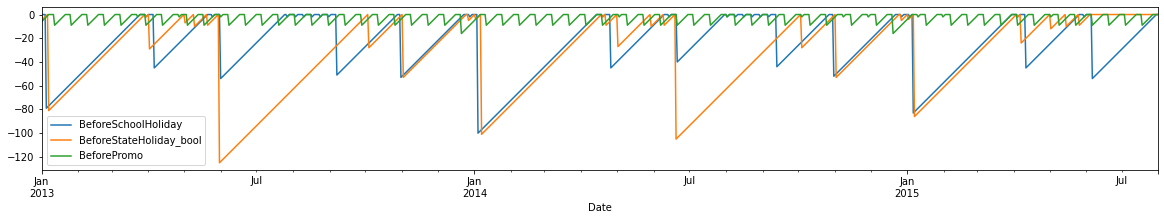

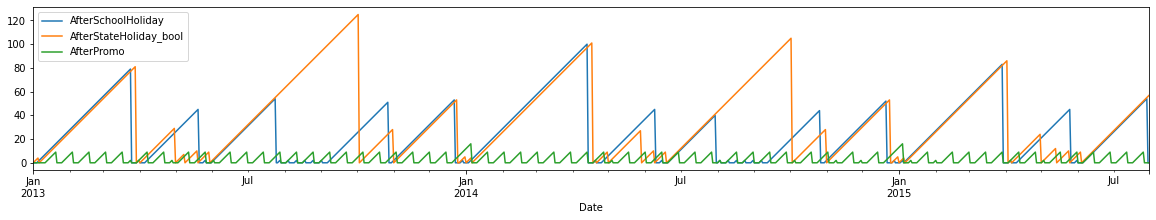

In [ ]:
#vemos como varian las variables 'After+evento' y 'Before+evento'
plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['BeforeSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['BeforeStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['BeforePromo'].plot()
plt.legend()
plt.show()

plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['AfterSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['AfterStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['AfterPromo'].plot()
plt.legend()
plt.show()

#### "Suavizado" de columnas temporales 

In [ ]:
#creamos las tablas 'bwd_train' y 'bwd_test' 
#agarramos las tablas que creamos antes, nos quedamos con 'Store' y lo que hay en columns: "Promo", "StateHoliday_bool", "SchoolHoliday"
#a partir de esta la ordenamos por los index que son las fechas de 'Date'
#agrupamos por 'Store' y vemos a partir de una ventana de una semana cuantos eventos hay 
#(vemos cuantos eventos hay en una semana)
bwd_train = df_train[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
bwd_test = df_test[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [ ]:
#se saca la 'Store' con valor 1 que se agrupa por la funcion de ventaneo rolling()
#se resetean los indices
bwd_train.drop('Store',1,inplace=True)
bwd_train.reset_index(inplace=True)
bwd_test.drop('Store',1,inplace=True)
bwd_test.reset_index(inplace=True)

In [ ]:
bwd_train.head()

,Store,Date,Promo,StateHoliday_bool,SchoolHoliday
0,1,2013-01-01,0.0,1.0,1.0
1,1,2013-01-02,0.0,1.0,2.0
2,1,2013-01-03,0.0,1.0,3.0
3,1,2013-01-04,0.0,1.0,4.0
4,1,2013-01-05,0.0,1.0,5.0


In [ ]:
#creamos 'fwd_train' y 'fwd_test'
#es lo mismo que las tablas anteriores pero al reves el orden temporal de las fechas
#vamos a contar cuantos eventos hay en una semana pero viendo a la semana anterior
fwd_train = df_train[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()
fwd_test = df_test[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()

In [ ]:
#se saca la 'Store' con valor 1 que se agrupa por la funcion de ventaneo rolling()
#se resetean los indices
fwd_train.drop('Store',1,inplace=True)
fwd_train.reset_index(inplace=True)
fwd_test.drop('Store',1,inplace=True)
fwd_test.reset_index(inplace=True)

In [ ]:
fwd_train.head(20)

,Store,Date,Promo,StateHoliday_bool,SchoolHoliday
0,1,2015-07-31,1.0,0.0,1.0
1,1,2015-07-30,2.0,0.0,2.0
2,1,2015-07-29,3.0,0.0,3.0
3,1,2015-07-28,4.0,0.0,4.0
4,1,2015-07-27,5.0,0.0,5.0
5,1,2015-07-26,5.0,0.0,5.0
6,1,2015-07-25,5.0,0.0,5.0
7,1,2015-07-24,4.0,0.0,4.0
8,1,2015-07-23,3.0,0.0,3.0
9,1,2015-07-22,2.0,0.0,2.0


#### Agregamos variables 'x_bw' y 'x_fw' a 'joined_train' y 'joined_test'

In [ ]:
#reseteamos lo indices de las tablas 'df_train' y 'df_test'
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [ ]:
#unimos las tablas 'df_...' con las 'bwd_...' y 'fwd_...'
#asi se crean las variables que terminan en '_bw' y '_fw'
df_train = df_train.merge(bwd_train, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_train = df_train.merge(fwd_train, 'left', ['Date', 'Store'], suffixes=['', '_fw'])
df_test = df_test.merge(bwd_test, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_test = df_test.merge(fwd_test, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [ ]:
df_train.drop(columns,1,inplace=True)
df_test.drop(columns,1,inplace=True)

In [ ]:
#pasamos 'Date' a formato fecha
df_train["Date"] = pd.to_datetime(df_train.Date)
df_test["Date"] = pd.to_datetime(df_test.Date)

In [ ]:
#unimos 'joined_...' con 'df_...' (a traves de 'Store' y 'Date')
joined_train = join_df(joined_train, df_train, ['Store', 'Date'])
joined_test = join_df(joined_test, df_test, ['Store', 'Date'])

In [ ]:
#guardamos los archivos que vamos a utilizar en la proxima etapa
joined_train.to_feather('all_preprocessed_train.fth')
joined_test.to_feather('all_preprocessed_test.fth')

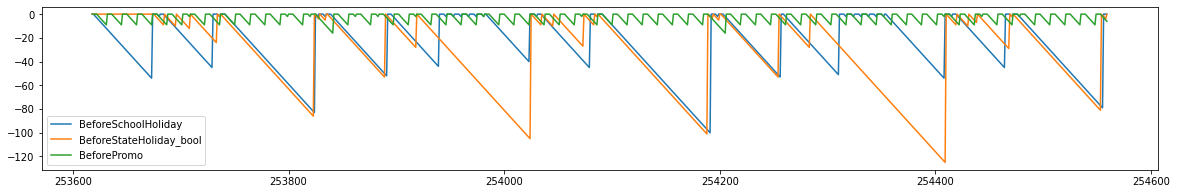

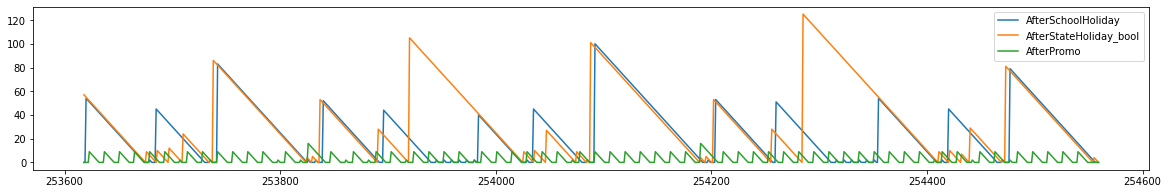

In [ ]:
plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['BeforeSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['BeforeStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['BeforePromo'].plot()
plt.legend()
plt.show()

plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['AfterSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['AfterStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['AfterPromo'].plot()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Promo')

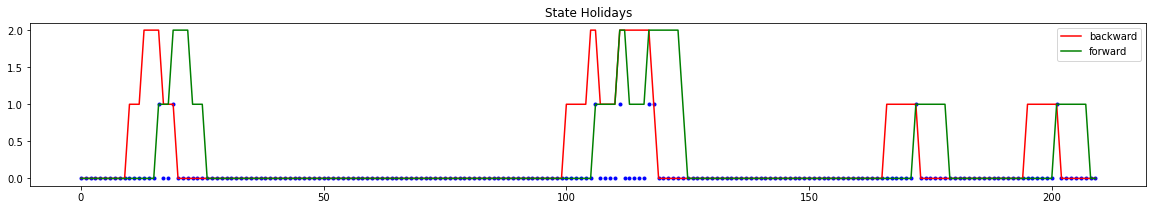

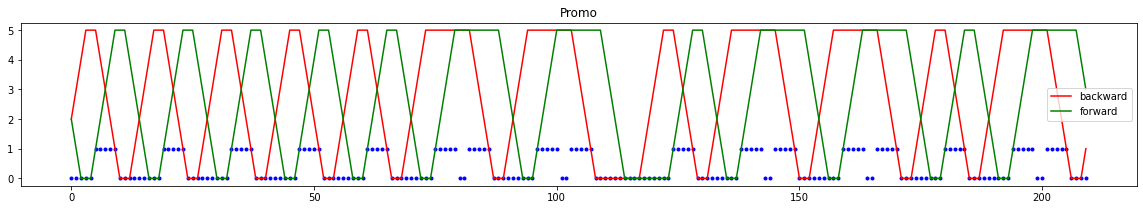

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool'].values[100:310]*1.0, c='b', marker='.', linestyle='None')
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool_bw'].values[100:310]*1.0, c='r', label='backward')
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool_fw'].values[100:310]*1.0, c='g', label='forward')
plt.legend()
plt.title('State Holidays')
plt.figure(figsize=(20,3))
plt.plot(joined_train[joined_train['Store']==280]['Promo'].values[100:310]*1.0, c='b', marker='.', linestyle='None')
plt.plot(joined_train[joined_train['Store']==280]['Promo_bw'].values[100:310]*1.0, c='r', label='backward')
plt.plot(joined_train[joined_train['Store']==280]['Promo_fw'].values[100:310]*1.0, c='g', label='forward')
plt.legend()
plt.title('Promo')

In [ ]:
joined_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,Max_TemperatureC,...,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,Year_y,Week_y,StateName,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterPromo,BeforePromo,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,Promo_bw,StateHoliday_bool_bw,SchoolHoliday_bw,Promo_fw,StateHoliday_bool_fw,SchoolHoliday_fw
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,9,2008,0,1,1990,-,2008-09-15,1990-01-01,HE,Rossmann_DE_HE,2015-08-02 - 2015-08-08,85,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Hessen,23,...,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,21.0,0.00,1.0,Fog,13,2015,31,Hessen,2510,24,9342,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2007-11-15,2010-03-29,TH,Rossmann_DE_TH,2015-08-02 - 2015-08-08,80,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Thueringen,19,...,7,9,6,3,100,62,25,1021,1019,1017,10.0,10.0,10.0,14,11,21.0,0.00,4.0,Fog,309,2015,31,Thueringen,2815,24,1950,25,False,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2006-12-15,2011-04-04,NW,Rossmann_DE_NW,2015-08-02 - 2015-08-08,86,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,NordrheinWestfalen,21,...,6,10,7,4,100,61,24,1022,1019,1017,31.0,14.0,10.0,14,5,21.0,0.00,2.0,Fog,354,2015,31,NordrheinWestfalen,3150,24,1579,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,9,2009,0,1,1990,-,2009-09-15,1990-01-01,BE,Rossmann_DE_BE,2015-08-02 - 2015-08-08,74,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Berlin,19,...,9,9,7,4,94,61,30,1019,1017,1014,10.0,10.0,10.0,23,16,21.0,0.00,6.0,Sunny,282,2015,31,Berlin,2145,24,9342,25,False,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,4,2015,0,1,1990,-,2015-04-15,1990-01-01,SN,Rossmann_DE_SN,2015-08-02 - 2015-08-08,82,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Sachsen,20,...,10,8,6,5,82,55,26,1020,1018,1016,10.0,10.0,10.0,14,11,21.0,0.00,4.0,Sunny,290,2015,31,Sachsen,107,3,9342,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",2014-06-15,2013-07-29,NW,Rossmann_DE_NW,2013-01-06 - 2013-01-12,63,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,62,2013-01-06,None,1,6,NordrheinWestfalen,8,...,2,7,5,1,94,87,65,1013,1005,1001,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215,2013,1,NordrheinWestfalen,0,0,0,0,True,0,-6,0,0,0,0,0.0,1.0,1.0,1.0,1.0,4.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,c,c,1880.0,4,2006,0,1,1990,-,2006-04-15,1990-01-01,NW,Rossmann_DE_NW,2013-01-06 - 2013-01-12,63,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,62,2013-01-06,None,1,6,NordrheinWestfale

#Normalize and encode


## Cargo los dataset preprocesados

In [ ]:
#Este paso se incluye en caso de retomar los siguientes pasos en otro tiempo.
#De esta forma, uno se ahorra tiempo al no realizar el preprocesamiento desde el inicio, 
#cargando los datos preprocesados que fueron guardados
df_train = pd.read_feather('all_preprocessed_train.fth')
df_test = pd.read_feather('all_preprocessed_test.fth')

In [ ]:
#Verificamos los tamaños de los dataframes cargados 
df_train.shape, df_test.shape

((1017209, 81), (41088, 80))

El objetivo es predecir las ventas ("Sales") de acuerdo a determinadas características que se presentan dentro del dataframe de entrenamiento. Además, como veremos más adelante se utilizará un segundo output de predicción el cual será "Customers". Es por esto que se verifica que la principal diferencia entre el dataset de entrenamiento y el de prueba sean las dos columnas antes mencionadas:  

In [ ]:
set(df_train.columns) - set(df_test.columns)

{'Customers', 'Sales'}

In [ ]:
#Previamente en el preprocesado todas las tiendas que no tuviesen un competidor cerca poseían Nan
#Tras realizar el preprocesamiento, esos valores se reemplazaron por la distancia máxima presente en la tabla
#Verificamos que el df_train y test cargados sean efectivamente aquellos a los que se realizó el preprocesado.
(df_train['CompetitionDistance'].isna()).sum()

0

El paso siguiente es convertir los dataframes en inputs compatibles con las redes neuronales. Esto implica que las variables categóricas deben ser convertidas a variables enteros continuos o en one-hot-encodings, y que las variables continuas deben ser normalizadas.

## Categorical vars

Dentro de las 81 variables presentes en el dataframe de entrenamiento las siguientes 22 columnas son aquellas variables categóricas y se utilizarán como entrada al modelo. Es decir, tienen valores finitos de clase.

In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 
            'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 
            'CompetitionOpenSinceYear', 'Promo2SinceYear', 
            'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 
            'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 
            'SchoolHoliday_bw']

In [ ]:
len(cat_vars)

22

Algunas de las booleanas, como prodran ver, se encuentran clasificadas dentro de las variables continuas. Si bien una booleana es una variable categorica (porque tiene un valor 0 o 1) esta clasificacion que realiza es por el tratamiento que va a darse sobre la variable. En este caso, como veremos mas adelante en el embeddings, se debe asignar una dimensionalidad al embedding de la variable categorica. En este caso la dimensionalidad original de las variables booleanas seria 2 y dado que la dimensionalidad del embedding debe ser menor se deberia asignar un embedding de dimension 1. Dado que son 2 categorias tomaria valores 0 o 1, que es lo mismo que la variable en si. Es por esto que la clasificamos en continua para no realizarle el mismo tratamiento que las categoricas (embedding). 
Analizando el standard scaler, el tratamiento que se realiza sobre las variables continuas, lo que se hace es dividir a las variables por el maximo valor presente en las categorias. En el caso de las booleanas este valor seria 1, por lo cual las variables quedarian igual. Sin embargo al verificar los valores de dichas variables booleanas esto no ocurre. 

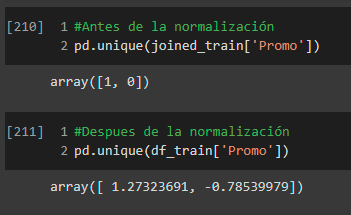

Como podemos ver en la siguiente tabla, se pueden considerar como variables categóricas a las variables numéricas que tomas valores finitos (como los días de la semana, el número de tienda, el año, mes). Además de ver los tipos de variables verificamos que no haya valores faltantes.

In [ ]:
DataFrameSummary(df_train[cat_vars]).summary().loc[['uniques', 'types', 'missing']].T

,uniques,types,missing
Store,1115,numeric,0
DayOfWeek,7,numeric,0
Year,3,numeric,0
Month,12,numeric,0
Day,31,numeric,0
StateHoliday,4,categorical,0
CompetitionMonthsOpen,25,numeric,0
Promo2Weeks,26,numeric,0
StoreType,4,categorical,0
Assortment,3,categorical,0


Tomamos como ejemplo 'StateHoliday_bool_bw', la cual es una variable numérica, sin embardo dado que solo toma 3 valores, se encuentra dentro de las variables categóricas.

In [ ]:
np.unique(df_train['StateHoliday_bool_bw'])

array([0., 1., 2.])

## Continuos Vars

Por otro lado, las siguientes variables son las que se toman como continuas:

In [ ]:
contin_vars = ['CompetitionDistance', 
               'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 
               'Precipitationmm', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 
               'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 
               'trend_DE', 'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 
               'Promo', 'SchoolHoliday', 'StateHoliday_bool']

In [ ]:
DataFrameSummary(df_train[contin_vars]).summary().loc[['uniques', 'types', 'missing']].T

,uniques,types,missing
CompetitionDistance,654,numeric,0
Max_TemperatureC,50,numeric,0
Mean_TemperatureC,45,numeric,0
Min_TemperatureC,40,numeric,0
Precipitationmm,40,numeric,0
Max_Humidity,52,numeric,0
Mean_Humidity,71,numeric,0
Min_Humidity,93,numeric,0
Max_Wind_SpeedKm_h,42,numeric,0
Mean_Wind_SpeedKm_h,27,numeric,0


## Normalización de variables continuas y LabelEncode de variables categoricas

In [ ]:
# pip install sklearn_pandas
from sklearn_pandas import DataFrameMapper

* El Label Encoder fija los valores de la columna para variables categóricas reemplazandolos por números. Tanto para el dataframe de entrenamiento como en la de prueba se tienen que realizar las mismas conversiones para que la red cuando se ingrese las variables explicativas para realizar la predicción,tenga la misma asociación. Por ejemplo: tenemos los meses del año como variable categórica. En el entrenamiento se convierten a números del 1 al 12 a través del Label Encoder. Entonces en el test también los meses deberán estar codificados con números del 1 al 12, si lo hiciera con otro tipo de encoding (por ejemplo: del 0 al 11) los meses del test no estarían asociados a los mismos meses del entrenamiento (Enero para el entrenamiento sería 1 y para la prueba seria 0, el cual dicho valor no existe en el encoding del dataset con el que se entrenó la red).

* El StandardScaler normaliza las variables continuas en función a la media y el desvío estándar de la muestra. Estos dos valores se almacenan para normalizar los valores del test con las mismas operaciones.

In [ ]:
cat_maps = [(o, LabelEncoder()) for o in cat_vars]
contin_maps = [([o], StandardScaler()) for o in contin_vars]

Como dijimos antes, se necesitan procesar de la misma forma las variables categóricas y continuas del dataframe test, por lo tanto a través del DataFrameMapper guarda los mapeos de esta instancia para porder aplicarselas al test.

In [ ]:
mapper_cat = DataFrameMapper(cat_maps)
_ = mapper_cat.fit(df_train)

Algunos ejemplos del mappeo de categóricas:

In [ ]:
# Assortment es la novena posición en cat_maps
N = 10
print(list(zip(df_train['Assortment'].values[:N], mapper_cat.transform(df_train)[:,9][:N])))
print(list(zip(df_train['Events'].values[:N], mapper_cat.transform(df_train)[:,15][:N])))
print(list(zip(df_train['Year'].values[:N], mapper_cat.transform(df_train)[:,2][:N])))

[('a', 0), ('a', 0), ('a', 0), ('c', 2), ('a', 0), ('a', 0), ('c', 2), ('a', 0), ('c', 2), ('a', 0)]
[('Fog', 0), ('Fog', 0), ('Fog', 0), ('Sunny', 20), ('Sunny', 20), ('Sunny', 20), ('Rain', 10), ('Rain', 10), ('Fog', 0), ('Sunny', 20)]
[(2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2)]


Realizó el mappeo también para las variables continuas:

In [ ]:
mapper_cont = DataFrameMapper(contin_maps)
_ = mapper_cont.fit(df_train)

Realizamos la operación de ciertos valores de la columna 'CompetitionDistance' a modo de ejemplo para ver la normalización de los valores:

In [ ]:
N = 10
print(df_train['CompetitionDistance'].values[:N])
print(mapper_cont.transform(df_train)[:, 0][:N])

[ 1270.   570. 14130.   620. 29910.   310. 24000.  7520.  2030.  3160.]
[-0.51104292 -0.59341201  1.00219483 -0.5875285   2.85902934 -0.62400624
  2.16359893  0.22439533 -0.42161363 -0.28864639]


Realizamos el LabelEncoder y StandardScaler ahora para todas las variables categóricas y continuas dentro de los dataframe de test y train:

In [ ]:
# La hacemos con todas ahora
df_train[cat_vars] = mapper_cat.transform(df_train)
df_test[cat_vars] = mapper_cat.transform(df_test)

In [ ]:
df_train[contin_vars] = mapper_cont.transform(df_train)
df_test[contin_vars] = mapper_cont.transform(df_test)

Visualizamos los resultados:

In [ ]:
df_train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,Max_TemperatureC,...,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,Year_y,Week_y,StateName,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterPromo,BeforePromo,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,Promo_bw,StateHoliday_bool_bw,SchoolHoliday_bw,Promo_fw,StateHoliday_bool_fw,SchoolHoliday_fw
0,0,4,2015-07-31,5263,555,1,1.273237,0,2.144211,2,6,30,30,2,0,-0.511043,9,13,0,1,0,0,2008-09-15,1990-01-01,4,Rossmann_DE_HE,2015-08-02 - 2015-08-08,1.744361,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Hessen,1.024446,...,0.325047,9,6,3,0.611120,-1.510789,-1.626560,1021,1018,1015,31.0,15.0,10.0,0.148437,-0.147662,21.0,-0.315778,-1.859165,0,13,2015,31,Hessen,2510,24,9342,25,-0.177442,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1
1,1,4,2015-07-31,6064,625,1,1.273237,0,2.144211,2,6,30,30,0,0,-0.593412,11,12,1,13,2,2,2007-11-15,2010-03-29,11,Rossmann_DE_TH,2015-08-02 - 2015-08-08,1.303439,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Thueringen,0.551899,...,0.170242,9,6,3,0.870277,-0.905024,-1.269897,1021,1019,1017,10.0,10.0,10.0,-0.970080,-0.147662,21.0,-0.315778,-0.493858,0,309,2015,31,Thueringen,2815,24,1950,25,-0.177442,0,0,0.965073,1.072424,0,0,5,0,5,1,0,1
2,2,4,2015-07-31,8314,821,1,1.273237,0,2.144211,2,6,30,30,0,0,1.002195,12,11,1,14,3,2,2006-12-15,2011-04-04,6,Rossmann_DE_NW,2015-08-02 - 2015-08-08,1.832546,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,NordrheinWestfalen,0.788172,...,0.015437,10,7,4,0.870277,-0.980745,-1.320848,1022,1019,1017,31.0,14.0,10.0,-0.970080,-1.165096,21.0,-0.315778,-1.404063,0,354,2015,31,NordrheinWestfalen,3150,24,1579,25,-0.177442,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1


In [ ]:
DataFrameSummary(df_train[cat_vars]).summary().loc[['uniques', 'types']]

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,4,21,8,12,52,22,6,6,3,3,8,8
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


## Final processing

In [ ]:
df_train.shape

(1017209, 81)

El siguiente paso fue remover todas las instancias donde las ventas fueron 0. El análsis realizado fue que hay períodos donde las tiendas se cierran para reabastecerse. Antes y después de esos períodos ocurren picos de ventas. Al omitir estos datos de su entrenamiento, los autores pierden información sobre estos períodos para predecir este comportamiento. Más adelante se analiza que sucedería con el modelo de eliminar este paso.

In [ ]:
df_sales = df_train[df_train.Sales!=0]

In [ ]:
df_sales.shape

(844338, 81)

In [ ]:
df_test.reset_index(inplace=True)

In [ ]:
df_sales.reset_index(inplace=True)

Guardamos el dataset normalizado

In [ ]:
path = '/content/drive/MyDrive/Redes TPS/'

In [ ]:
df_sales.to_feather(path+'train_normalized_data.fth')

In [ ]:
df_test.to_feather(path+'test_normalized_data.fth')

Sin embargo, podemos ver que hay dentro del dataset test, registros cuyas ventas han sido 0.

In [ ]:
(df_test['Open'] == 0).sum()

5984

In [ ]:
(df_sales['Open'] == 0).sum()

0

#Baselines

## Cargo los dataframes normalizados

In [ ]:
df = pd.read_feather(path+'train_normalized_data.fth')
df_test = pd.read_feather(path+'test_normalized_data.fth')

Divido en entrenamiento y validación:     

* Todos los registros anteriores a 1/7/2015 son de entrenamiento
* Todos los registros posetriores a esa fecha son de validación de esa forma consideramos un tiempo posterior a los que se encuentranen entrenamiento para predecir "el futuro".

La proporción es 96% de los datos para el train y 3% de los datos para validación, quedando 844338 en entrenamiento, y 30188 en validación.

In [ ]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
len(df_train)/len(df), len(df_val)/len(df), len(df), len(df_val)

(0.9642465458145908, 0.035753454185409164, 844338, 30188)

In [ ]:
final_train = False

###Métricas


$$\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}$$

donde:    

* $y_i$ son las ventas de un día específico de un store
* $\hat{y}_i$ son las ventas predecidas por el modelo
* $n$ es el número de predicciones realizadas


In [ ]:
#realiza la métrica RMSE en base a las ventas reales (sales) y las estimadas por el modelo (sales_)
def get_metric(sales, sales_):
    return np.sqrt((((sales - sales_)/sales)**2).sum()/len(sales))

Veo que columnas son las presentes para entrenar el modelo

In [ ]:
df_train.columns

Index(['index', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week',
       'Day', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitatio

In [ ]:
max_sales = df_train['Sales'].max() #máximo de ventas del entrenamiento
df.loc[:, 'Sales_norm'] = df['Sales'].values/max_sales #normaliza las ventas

In [ ]:
#normalizo las ventas para el train y la validacion tambien
df_train.loc[:, 'Sales_norm'] = df_train['Sales'].values/max_sales
df_val.loc[:, 'Sales_norm'] = df_val['Sales'].values/max_sales

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Se comparan los valores dentro del dataset del entrenamiento con la media. De no haber eliminado en la normalización aquellos registros con Sales = 0, al realizar el RMSE hubiese dado una indeterminación al intentar dividir por cero dado que $y_i = 0$.

In [ ]:
print('Train:')
print(get_metric(df_train['Sales_norm'], 
                 df_train['Sales_norm'].mean()))
print('Val:')
get_metric(df_val['Sales_norm'], 
           df_train['Sales_norm'].mean())

Train:
0.6371089378658443
Val:


0.5496723521813062

In [ ]:
#devuelve la media del 
def get_mean_by_column(column, sales_str):
    group_means_dict = {}
    group_mean_list = []
    for col_value, group_df in df_train.groupby(column):
        group_mean =  group_df[group_df[sales_str] > 0][sales_str].mean()
        group_means_dict[col_value] = group_mean
        group_mean_list.append(group_mean)
    print('Train:', get_metric(df_train[sales_str], 
                               df_train[column].apply(group_means_dict.get)))
    print('Val:', get_metric(df_val[sales_str], 
                             df_val[column].apply(group_means_dict.get)))
    return group_means_dict, group_mean_list

In [ ]:
# Media por store
_ = get_mean_by_column('Store', 'Sales_norm')

Train: 0.39609135212418334
Val: 0.3071746085338872


In [ ]:
# Media por dia de la semana
_ = get_mean_by_column('DayOfWeek', 'Sales_norm')

Train: 0.600887492275444
Val: 0.506139218663547


In [ ]:
# Media por numera de semana (1-52)
_ = get_mean_by_column('Week', 'Sales_norm')

Train: 0.6077405789213656
Val: 0.5171468581189805


In [ ]:
# Media por mes
_ = get_mean_by_column('Month', 'Sales_norm')

Train: 0.6326710739722307
Val: 0.5444650400703042


In [ ]:
#Media por feriado estatal
_ = get_mean_by_column('StateHoliday', 'Sales_norm')

Train: 0.637967104604832
Val: 0.5494193814701546


In [ ]:
#media por feriado de colegio
_ = get_mean_by_column('SchoolHoliday', 'Sales_norm')

Train: 0.6352131730794036
Val: 0.552288625488801


### Primer modelo

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [ ]:
#funcion de pérdida
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [ ]:
#función generadora de modelo si los parámetros no tienen Embedding
def get_keras_LR(X_columns, hidden_units=1):
    inputs = []
    activation = 'linear'
    if hidden_units>1:
        activation = 'relu'
    for i, col in enumerate(X_columns):
        inp = Input(shape=(X_train[i].shape[1],), name=f"{col}_input")
        inputs.append(inp)
    if len(X_columns)>1:
        concat_out = Concatenate()(inputs)
        dense_out = Dense(hidden_units, name='Dense', activation=activation)(concat_out)
    else:
        dense_out = Dense(hidden_units, name='Dense', activation=activation)(inputs[0])
    if hidden_units>1:
        dense_out = Dense(1, name='Dense_out')(dense_out)
    model = Model(inputs, dense_out)
    model.compile(optimizers.Adam(lr=0.0001), loss='mse', metrics=[rmspe, 'mse'])
    return model

#función generadora de modelo si los parámetros tienen Embedding
def get_embedings_NN(X_columns, hidden_units = 20, activation = 'relu'):
    embed_outs = []
    inputs = []
    for i, col in enumerate(X_columns):
        inp = Input(shape=(1,), name=f"{col}_input")
        inputs.append(inp)
        if col in embed_outs_dict:
            embed_out = Embedding(len(np.unique(X_train[i])), embed_outs_dict[col], name=f"{col}_embedding", mask_zero=False)(inp)
            out = Flatten(name=f"{col}_flatten")(embed_out)
            embed_outs.append(out)
        else:
            embed_outs.append(inp)
        
    if len(X_columns)>1:
        concat_out = Concatenate()(embed_outs)
        dense_out = Dense(hidden_units, activation=activation)(concat_out)
    else:
        dense_out = Dense(hidden_units, activation=activation)(out)
    out = Dense(1)(dense_out)
    model = Model(inputs, out)
    model.compile(optimizers.Adam(lr=0.0001), loss='mse', metrics=[rmspe, 'mse'])
    return model

In [ ]:
with_embed = True
embed_outs_dict = {'Store': 2, 'DayOfWeek': 2} #,  'Week': 2, 'Month': 2}
X_columns = list(embed_outs_dict.keys())# + ['BeforeStateHoliday_bool', 'Max_TemperatureC'] # ['Precipitationmm']
#A partir de las variables elegidas en embed_outs_dict extraemos esas columnas y hacemos nuestro train para entrenar el modelo
if final_train: #si es el entrenamiento final, no realizó con validation sino que saco el train del dataset completo
    X_train = np.hsplit(df[X_columns].values, len(X_columns))
    y_train = df['Sales_norm']
else: #saco el train de la división hecha previamente entre validacion y train
    X_train = np.hsplit(df_train[X_columns].values, len(X_columns))
    y_train = df_train['Sales_norm']
#A partir de las variables elegidas en embed_outs_dict extraemos esas columnas y hacemos nuestro validation y test   
X_val = np.hsplit(df_val[X_columns].values, len(X_columns))
X_test = np.hsplit(df_test[X_columns].values, len(X_columns))
#si no se realiza embedding pasamos las variables a una matriz con 0 y 1s que representen las categorias que entran
if not with_embed:
    for i in range(len(X_train)):
        X_train[i] = to_categorical(X_train[i])
        X_val[i] = to_categorical(X_val[i])
        X_test[i] = to_categorical(X_test[i])

y_val = df_val['Sales_norm']

In [ ]:
# generamos los modelos dependiendo si hay embedding
if with_embed: 
    model = get_embedings_NN(X_columns)
else:
    model = get_keras_LR(X_columns, hidden_units=20)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Store_embedding (Embedding)     (None, 1, 2)         2230        Store_input[0][0]                
__________________________________________________________________________________________________
DayOfWeek_embedding (Embedding) (None, 1, 2)         14          DayOfWeek_input[0][0]            
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras import callbacks

In [ ]:
#entrenamos el modelo 
epochs = 20
model.compile(optimizers.Adam(lr=0.001), loss='mse', metrics=[rmspe, 'mse'])
cbs = [callbacks.ReduceLROnPlateau(monitor='val_rmspe', mode='min', verbose=1, patience=2), callbacks.ModelCheckpoint('best_val_rmspe.hdf5', monitor='val_rmspe', mode='min', verbose=1, save_best_only=True)]
if final_train: #sin validacion si es el entrenamiento final p
    model.fit(X_train, y_train, epochs=epochs, callbacks=cbs)
else: #con validacion para conseguir los mejores hiperparámetros
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=cbs)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25443/25443 [==============================] - 35s 1ms/step - loss: 0.0020 - rmspe: 0.2892 - mse: 0.0020 - val_loss: 0.0014 - val_rmspe: 0.2131 - val_mse: 0.0014

Epoch 00001: val_rmspe improved from inf to 0.21311, saving model to best_val_rmspe.hdf5
Epoch 2/20
25443/25443 [==============================] - 33s 1ms/step - loss: 0.0018 - rmspe: 0.2669 - mse: 0.0018 - val_loss: 0.0013 - val_rmspe: 0.2082 - val_mse: 0.0013

Epoch 00002: val_rmspe improved from 0.21311 to 0.20825, saving model to best_val_rmspe.hdf5
Epoch 3/20
25443/25443 [==============================] - 34s 1ms/step - loss: 0.0018 - rmspe: 0.2651 - mse: 0.0018 - val_loss: 0.0013 - val_rmspe: 0.2083 - val_mse: 0.0013

Epoch 00003: val_rmspe did not improve from 0.20825
Epoch 4/20
25443/25443 [==============================] - 33s 1ms/step - loss: 0.0018 - rmspe: 0.2643 - mse: 0.0018 - val_loss: 0.0013 - val_rmspe: 0.2097 - val_mse: 0.0013

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000

In [ ]:
#cargamos el modelo con el mejor resultado en validación
model.load_weights('best_val_rmspe.hdf5')

In [ ]:
#lo evaluamos con el train
model.evaluate(X_train, y_train)

25443/25443 [==============================] - 26s 1ms/step - loss: 0.0017 - rmspe: 0.2252 - mse: 0.0017


[0.0017031823517754674, 0.22523650527000427, 0.0017031823517754674]

In [ ]:
#lo evaluamos con el test
model.evaluate(X_val, y_val)

944/944 [==============================] - 1s 1ms/step - loss: 0.0013 - rmspe: 0.2060 - mse: 0.0013


[0.0013181890826672316, 0.20604366064071655, 0.0013181890826672316]

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
#Graficamos los pesos para la variable especificada
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 2)


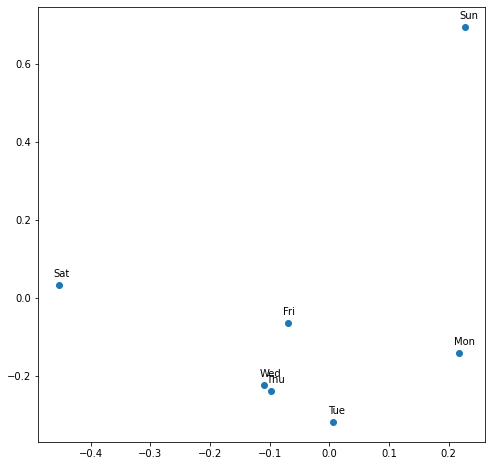

In [ ]:
#Graficamos los pesos para los días de la semana
plot_embed('DayOfWeek_embedding', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(1115, 2)


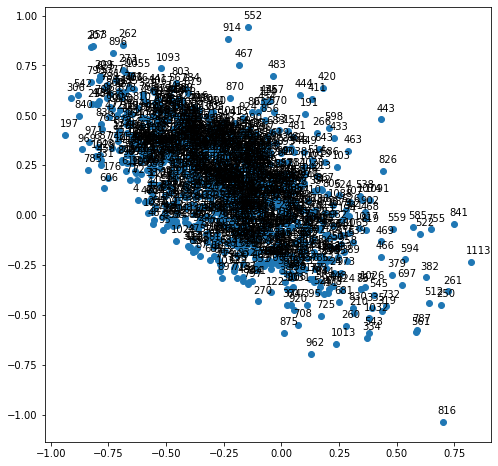

In [ ]:
#graficamos los pesos para el número de tienda
plot_embed('Store_embedding', list(range(1115)))

In [ ]:
#hacemos predicciones sobre el train como va a estar normalizado multiplicamos por el mayor valor
train_predictions = model.predict(X_train)*max_sales
#obtenemos las métricas
get_metric(df_train['Sales'].values, train_predictions.reshape(-1))

0.30118970154818026

In [ ]:
#repetimos para el test
test_predictions = model.predict(X_test)*max_sales
# Todos las predicciones cuyas tiendas no estan abiertas, les pone 0.
test_predictions[df_test['Open'] == 0] = 0

### Genera el sample submission

In [ ]:
sample_csv = pd.read_csv('/content/drive/MyDrive/Redes TPS/TP2/data/sample_submission.csv')
sample_csv['Sales'] = test_predictions
sample_csv.head()
sample_csv.to_csv(f'submision_baseline_{"-".join(X_columns)}.csv', index=False)

#Embeddings

Muchos algoritmos de Machine learning y Deep learning no pueden lidiar con las variables categóricas a menos que sean convertidas  a números. El problema está en que su performance varía significativamente en la forma en la que estas variable s categóricas son codificiadas a variables numéricas.

El One Hot enconding, trae ciertos problemas. Tomemos por ejemplo la variable categórica 'Store' de nuestro dataset. esta contiene 1115 categorías. El One Hot Encoding también es otra forma de pasar variables categóricas a una forma numérica ya que genera un vector de 1115 elementos con 0 y 1. Por ejemplo si una ve una venta en la tienda 2, para ingresar la variable se tendrá un vector con zeros, salvo en el índice 1 (el segundo elemento) donde se colocará un 1. Esto implica que para 100 registros de tienda tendremos una matriz de 100 filas x 1115 columnas. Pero nuestro dataset es aún más grande que eso. Y un tamaño grande de input implica que se necesita mayor cantidad de pesos, lo cual a su vez ocasiona que se necesite una gran cantidad de data y más operaciones, para entrenar el modelo.

Entre las soluciones se encuentra el Embedding. El Embedding es una representación vectorial de la variable categórica el cual no solo le da a as categórica su equivalente numérico si no que capta caracteríticas entre ellas permitiendo mantener en el especio generado por el vector de embedding aquellos que son similares de forma más cercana y distantes los que no. Por ejemplo en días de la semana como variable categórica podría captar asociaciones de los días del fin de semana, haciendo sus vectores de embedding más parecidos entre sí. Esta codificación se realiza en un espacio de menor dimensión. Por ejemplo en el caso de los 'Store', uno no realizará un embedding de 1115. En el código de le asigna una dimensionalidad del embedding correspondiente a cada variable categórica y en el caso de 'Store' fue de 50.

Entonces, con el Embedding, debemos encontrar el balance de teer suficientes dimensiones como para codificar de forma correcta las relaciones entre los datos, pero también que el nuevo espacio sea lo suficientemente chico como para permitir entrenar nuestro modelo de forma rápida.



##Cargamos los datos

In [ ]:
df_test = pd.read_feather(path+'test_normalized_data.fth')

- Para verificar que columnas tiene originalmente tests. Por ejemplo, como es de esperar, la columna customers no es dato y podría intentar estimarse tambien
- Es bastante discutible usar el clima y temperatura (Se puede usar el forecast si es en el futuro)
- En un caso real no parece sensato usar google trend

In [ ]:
df_test.columns

Index(['index', 'Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCove

In [ ]:
df = pd.read_feather(path+'train_normalized_data.fth')

In [ ]:
df.head(3)

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,...,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,Year_y,Week_y,StateName,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterPromo,BeforePromo,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,Promo_bw,StateHoliday_bool_bw,SchoolHoliday_bw,Promo_fw,StateHoliday_bool_fw,SchoolHoliday_fw
0,0,0,4,2015-07-31,5263,555,1,1.273237,0,2.144211,2,6,30,30,2,0,-0.511043,9,13,0,1,0,0,2008-09-15,1990-01-01,4,Rossmann_DE_HE,2015-08-02 - 2015-08-08,1.744361,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Hessen,...,0.325047,9,6,3,0.611120,-1.510789,-1.626560,1021,1018,1015,31.0,15.0,10.0,0.148437,-0.147662,21.0,-0.315778,-1.859165,0,13,2015,31,Hessen,2510,24,9342,25,-0.177442,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1
1,1,1,4,2015-07-31,6064,625,1,1.273237,0,2.144211,2,6,30,30,0,0,-0.593412,11,12,1,13,2,2,2007-11-15,2010-03-29,11,Rossmann_DE_TH,2015-08-02 - 2015-08-08,1.303439,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Thueringen,...,0.170242,9,6,3,0.870277,-0.905024,-1.269897,1021,1019,1017,10.0,10.0,10.0,-0.970080,-0.147662,21.0,-0.315778,-0.493858,0,309,2015,31,Thueringen,2815,24,1950,25,-0.177442,0,0,0.965073,1.072424,0,0,5,0,5,1,0,1
2,2,2,4,2015-07-31,8314,821,1,1.273237,0,2.144211,2,6,30,30,0,0,1.002195,12,11,1,14,3,2,2006-12-15,2011-04-04,6,Rossmann_DE_NW,2015-08-02 - 2015-08-08,1.832546,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,NordrheinWestfalen,...,0.015437,10,7,4,0.870277,-0.980745,-1.320848,1022,1019,1017,31.0,14.0,10.0,-0.970080,-1.165096,21.0,-0.315778,-1.404063,0,354,2015,31,NordrheinWestfalen,3150,24,1579,25,-0.177442,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1


In [ ]:
#definimos las variables categóricas de las continuas
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

In [ ]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [ ]:
DataFrameSummary(df[cat_vars]).summary().loc[['uniques', 'types']]

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,4,21,8,12,52,22,6,6,3,3,8,8
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


In [ ]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [ ]:
uniques

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,4,21,8,12,52,22,6,6,3,3,8,8


## Asignación de dimensión de embeddings

Como describimos antes, se necesita asignarle una dimensión a los embeddings que vamos a realizar. Se debe encontrar el balance de tener suficientes dimensiones como para codificar de forma correcta las relaciones entre los datos, pero también que el nuevo espacio sea lo suficientemente chico como para permitir entrenar nuestro modelo de forma rápida


In [ ]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 4, 'Year': 2, 'Month': 6,
'Day': 10, 'StateHoliday': 3, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 2, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_fw': 1,
'StateHoliday_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

### Ejemplo de modelo con DayOfWeek, store y CompetitionDistance

In [ ]:
uniques['DayOfWeek'][0]

7

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate

In [ ]:
#definimos las capas de entrada para cada variable
day_of_week_input = Input(shape=(1,), name="day_of_week_input")
store_input = Input(shape=(1,), name="store_input")
# Por ser continua competition_distance no necesita embeddings
competition_distance_input = Input(shape=(1,), name="competition_distance_input")
#agregamos las capas de embedding para las variables categóricas
day_of_week_Embedd_out = Embedding(uniques['DayOfWeek'][0], cat_var_dict['DayOfWeek'], name="day_of_week_Embedd")(day_of_week_input)
store_Embedd_out = Embedding(uniques['Store'][0], cat_var_dict['Store'], name="store_Embedd")(store_input)

In [ ]:
#imprimimos las dimensiones
print(f'Entradas: {day_of_week_input.shape}, {store_input.shape}')
print(f'Salidas: {day_of_week_Embedd_out.shape}, {store_Embedd_out.shape}')
#como podemos ver se le agrega la dimensionalidas que fue definida anteriormente

Entradas: (None, 1), (None, 1)
Salidas: (None, 1, 4), (None, 1, 50)


In [ ]:
#seguimos definiendo el modelo de la red
day_of_week_Embedd_flat = Flatten(name="day_of_week_flat")(day_of_week_Embedd_out)
store_Embedd_flat = Flatten(name="store_flat")(store_Embedd_out)

In [ ]:
merged = Concatenate(name='All_Concatenate')([day_of_week_Embedd_flat, store_Embedd_flat, competition_distance_input])

In [ ]:
x = Dense(1000, activation='relu')(merged)
x = Dense(500, activation='relu')(x)
output = Dense(1, activation='linear')(x)

In [ ]:
model = Model([day_of_week_input, store_input, competition_distance_input], output)

In [ ]:
#este es el modelo resultante
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
day_of_week_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
day_of_week_Embedd (Embedding)  (None, 1, 4)         28          day_of_week_input[0][0]          
__________________________________________________________________________________________________
store_Embedd (Embedding)        (None, 1, 50)        55750       store_input[0][0]                
____________________________________________________________________________________________

In [ ]:
#dividimos por fecha el dataset en entrenamiento y validación
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]

In [ ]:
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [ ]:
#cantidad de registros, variables a ingresar al modelo
df_train[['DayOfWeek', 'Store', 'CompetitionDistance']].values.shape

(814150, 3)

In [ ]:
X_train = np.hsplit(df_train[['DayOfWeek', 'Store', 'CompetitionDistance']].values, 3)
X_val = np.hsplit(df_val[['DayOfWeek', 'Store', 'CompetitionDistance']].values, 3)

In [ ]:
# Normalización del output para entrenar
y_mean = df_train['Sales'].mean()
y_std = df_train['Sales'].std()

In [ ]:
y_train = (df_train['Sales'].values - y_mean)/y_std
y_val = (df_val['Sales'].values - y_mean)/y_std

In [ ]:
model.compile(optimizer=Adam(lr=0.001), metrics=['mse'], loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#como es una prueba entreno con una sola epoch
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=1, batch_size=256)

3181/3181 [==============================] - 66s 21ms/step - loss: 0.3352 - mse: 0.3352 - val_loss: 0.2547 - val_mse: 0.2547


## Métrica


$$\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}$$

donde:    

* $y_i$ son las ventas de un día específico de un store
* $\hat{y}_i$ son las ventas predecidas por el modelo
* $n$ es el número de predicciones realizadas


In [ ]:
#predecimos con las variables de validaciones
y_pred_norm = model.predict(X_val, verbose=1)
y_pred = y_pred_norm*y_std + y_mean

944/944 [==============================] - 2s 2ms/step


In [ ]:
def root_mean_squared_error_np(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_pred - y_true)), axis=-1))

def rmspe_np(y_true, y_pred):
    MSEP_ = ((y_true - y_pred)/y_true)**2
    return np.sqrt(MSEP_.mean())

In [ ]:
#sacamos la métrica
rmspe_np(df_val['Sales'].values, y_pred.reshape(-1))

0.23305270497036623

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


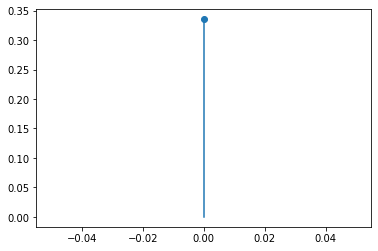

In [ ]:
from matplotlib import pyplot as plt

plt.stem(history.history['loss'])
plt.show()

#Full model

## Cargamos datos normalizados

In [ ]:
path ='/content/drive/MyDrive/Redes TPS/'

In [ ]:
df = pd.read_feather(path+'train_normalized_data.fth')
df_test = pd.read_feather(path+'test_normalized_data.fth')

In [ ]:
pd.unique(df_train['Promo'])

array([ 1.27323691, -0.78539979])

Y definimos las variables categóricas y continuas.

In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month',  'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'State', 'Events','Promo', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']
#cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
#            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
#            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

#cat_vars = ['Store', 'DayOfWeek']

In [ ]:
contin_vars = ['CompetitionDistance', 'Mean_TemperatureC', 'Precipitationmm',
  'Mean_Humidity', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'BeforeStateHoliday_bool', 'BeforeSchoolHoliday']
#contin_vars = ['CompetitionDistance', 
#   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
#   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
#   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
#   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'Promo', 'SchoolHoliday', 'StateHoliday_bool']
#contin_vars = ['BeforeStateHoliday_bool', 'Max_TemperatureC']

In [ ]:
contin_vars

['CompetitionDistance',
 'Mean_TemperatureC',
 'Precipitationmm',
 'Mean_Humidity',
 'Mean_Wind_SpeedKm_h',
 'CloudCover',
 'trend',
 'BeforeStateHoliday_bool',
 'BeforeSchoolHoliday']

In [ ]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [ ]:
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
CompetitionMonthsOpen,25
Promo2Weeks,26
StoreType,4
Assortment,3
PromoInterval,4
State,12


### Seleccion de variables

In [ ]:
from matplotlib.pyplot import figure

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, title, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
      fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
      idx = z.argsort()
      x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    cbar.ax.set_title(title)

    return ax

In [ ]:
for x_selec_name in contin_vars:
  y_selec = np.array(df_train['Sales'])
  x_selec = np.array(df_train[x_selec_name])
  density_scatter( x_selec , y_selec, x_selec_name, bins = [100,100])
  #a1 = figure(figsize=(8, 6), dpi=80)
  #a1.scatter(x_selec,y_selec)
  #a1.title(x_selec_name)


## Asignación de dimensión de embeddings

Realizamos la asignación de la dimensionalidad de los embedding para las variables categóricas como explicamos en el inciso anterior:

In [ ]:
'''cat_var_dict = {'Store': 50, 'DayOfWeek': 2, 'Year': 2, 'Month': 2,
'Day': 10, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}'''

In [ ]:


cat_var_dict = {'Store': 50, 'DayOfWeek': 2, 'Year': 2, 'Month': 2,
'Day': 10, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Promo':1, 'SchoolHoliday':1, 'StateHoliday_bool':1,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

In [ ]:
#este for imprime los valores unicos para cada variable categórica 
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 50 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 2 7 [0 1 2 3 4 5 6]

Year 2 3 [0 1 2]

Month 2 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

CompetitionMonthsOpen 2 25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Promo2Weeks 1 26 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

StoreType 2 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

PromoInterval 3 4 [0 1 2 3]

State 6 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Events 4 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

Promo 1 2 [-0.78539979  1.27323691]

Promo_fw 1 6 [0 1 2 3 4 5]

Promo_bw 1 6 [0 1 2 3 4 5]

StateHoliday_bool_fw 1 3 [0 1 2]

StateHoliday_bool_bw 1 3 [0 1 2]

SchoolHoliday_fw 1 8 [0 1 2 3 4 5 6 7]

SchoolHoliday_bw 1 8 [0 1 2 3 4 5 6 7]



## Definición de modelo

In [ ]:
#en modo de regularización se puede agregar el output de 'Customers'
add_customers = True
#si el output es en forma logarítimica
log_output = False
output_activation = 'linear'

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
#definimos las capas de input y outputs en base a si las variables son categoricas o continuas para realizarle un embedding según sea necesario
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [ ]:
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

In [ ]:
#seguimos definiendo el modelo a continuación de las capas de inputs generadas
first_hidden_units = 1000
second_hidden_units = 500
l2_lambda = 1e-3
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

In [ ]:
#en modo de regularización se puede agregar el output de 'Customers' para predecir, por lo tanto una capa de output con las dimensiones correspondientes
if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

In [ ]:
# Descomentar para ver
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
____________________________________________________________________________________________

In [ ]:
model.save_weights('initial_weights.hdf5')

In [ ]:
#dividimos train y validation a partir de la fecha
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

In [ ]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [ ]:
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)
df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
from tensorflow.keras import backend as K

In [ ]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [ ]:
def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

In [ ]:
#obtengo la métrica de comparar las ventas respectoa  la media por tienda
get_metric(df_val, df_val['mean_by_store'])

0.30717460853388645

In [ ]:
#obtengo el validacion, train y test con las variables elegidas
all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

In [ ]:
if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
#     y_mean = df_train[y_out_columns].mean().values
#     y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

In [ ]:
#defino hiperparametros, optimizador, métricas para evaluar el mdoelo
lr = 0.00001
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#guardamos el mejor modelo
if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
epochs = 50
batch_size = 256
#entrenamos la red
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

Epoch 1/50
3181/3181 - 75s - loss: 0.3047 - Sales_loss: 0.0061 - Customers_loss: 0.0030 - Sales_mse: 0.0061 - Sales_rmspe: 0.5612 - Customers_mse: 0.0030 - Customers_rmspe: 0.5474 - val_loss: 0.1757 - val_Sales_loss: 0.0035 - val_Customers_loss: 0.0018 - val_Sales_mse: 0.0035 - val_Sales_rmspe: 0.4082 - val_Customers_mse: 0.0018 - val_Customers_rmspe: 0.4195

Epoch 00001: val_Sales_mse improved from inf to 0.00347, saving model to bestmodel.hdf5
Epoch 2/50
3181/3181 - 73s - loss: 0.1314 - Sales_loss: 0.0023 - Customers_loss: 0.0012 - Sales_mse: 0.0023 - Sales_rmspe: 0.3509 - Customers_mse: 0.0012 - Customers_rmspe: 0.3325 - val_loss: 0.1058 - val_Sales_loss: 0.0020 - val_Customers_loss: 0.0011 - val_Sales_mse: 0.0020 - val_Sales_rmspe: 0.3039 - val_Customers_mse: 0.0011 - val_Customers_rmspe: 0.2993

Epoch 00002: val_Sales_mse improved from 0.00347 to 0.00201, saving model to bestmodel.hdf5
Epoch 3/50
3181/3181 - 73s - loss: 0.0941 - Sales_loss: 0.0016 - Customers_loss: 8.1127e-04 - Sa

In [ ]:
model.save('/content/drive/MyDrive/Redes TPS/TP2/data/modelo1.h5')

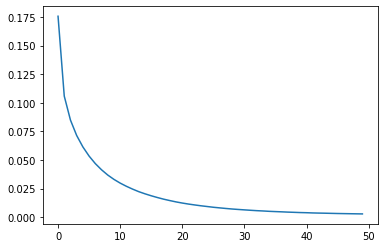

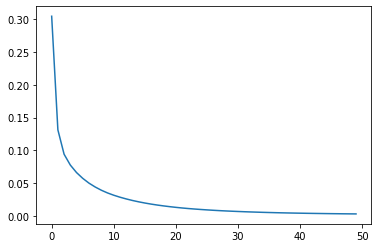

In [ ]:
#ploteamos la loss de validación y de entrenamiento
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_Customers_mse'])
# plt.plot(history.history['val_Sales_mse'])
plt.show()
plt.plot(history.history['loss'])
# plt.plot(history.history['Customers_mse'])
# plt.plot(history.history['Sales_mse'])

## Métrica


$$\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}$$

donde:    

* $y_i$ son las ventas de un día específico de un store
* $\hat{y}_i$ son las ventas predecidas por el modelo
* $n$ es el número de predicciones realizadas


In [ ]:
#evaluamos con validación
model.evaluate(X_val, y_val)

944/944 [==============================] - 4s 4ms/step - loss: 0.0028 - Sales_loss: 8.0774e-04 - Customers_loss: 2.9553e-04 - Sales_mse: 8.0774e-04 - Sales_rmspe: 0.1904 - Customers_mse: 2.9553e-04 - Customers_rmspe: 0.1750


[0.002785163465887308,
 0.0008077378151938319,
 0.00029553158674389124,
 0.0008077378151938319,
 0.19038093090057373,
 0.00029553158674389124,
 0.17502804100513458]

In [ ]:
#evaluamos el mejor modelo con validación
model.load_weights('bestmodel.hdf5')
model.evaluate(X_val, y_val)

944/944 [==============================] - 4s 4ms/step - loss: 0.0036 - Sales_loss: 7.8032e-04 - Customers_loss: 2.8466e-04 - Sales_mse: 7.8032e-04 - Sales_rmspe: 0.1788 - Customers_mse: 2.8466e-04 - Customers_rmspe: 0.1662


[0.003634096821770072,
 0.0007803226471878588,
 0.0002846569404937327,
 0.0007803226471878588,
 0.178767591714859,
 0.0002846569404937327,
 0.1661599576473236]

In [ ]:
#si elegimos realizarle una transformación logarítmica, realizamos las siguientes operaciones par conseguir la predicción de ventas sin escaal logaritmica
if log_output:
    if add_customers:
        y_pred = np.exp(model.predict(X_val, verbose=1)[0][:, 0]*max_log_y[0])
        y_pred_test = np.exp(model.predict(X_test, verbose=1)[0][:, 0]*max_log_y[0])
    else:
        y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)[:,0]
        y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)[:,0]
else:
    if add_customers:
        y_pred = (model.predict(X_val, verbose=1)[0]*y_max[0])[:,0]
        y_pred_test = (model.predict(X_test, verbose=1)[0]*y_max[0] )[:,0]
    else:
#         y_pred = model.predict(X_val, verbose=1)[:,0]*y_std + y_mean
#         y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_std + y_mean
        y_pred = model.predict(X_val, verbose=1)[:,0]*y_max
        y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_max
#aquellas preducciones con tiendas cerradas, igualar a cero.
y_pred_test[df_test['Open'] == 0] = 0

1284/1284 [==============================] - 7s 5ms/step


In [ ]:
np.sqrt((((df_val['Sales'].values - y_pred)/df_val['Sales'].values)**2).sum()/len(y_pred))

0.208218527349227

In [ ]:
y_pred_test[:10]

array([4696.7607, 7278.828 , 9237.869 , 5331.541 , 6531.892 , 5434.8594,
       8363.648 , 7869.193 , 4981.9497, 5326.456 ], dtype=float32)

## Baseline

In [ ]:
import pandas as pd
sample_csv = pd.read_csv('/content/drive/MyDrive/Redes TPS/TP2/data/sample_submission.csv')

In [ ]:
#sacamos la media de ventas de cada tienda
stores_mean = {}
for store, g_df in df.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [ ]:
#agregamos la media como predicción de test
df_test['Sales'] = df_test['Store'].apply(stores_mean.get)
#aquellas tiendas cerradas le ingresamos ventas nulas
df_test.loc[df_test['Open'] == 0, 'Sales'] = 0

In [ ]:
df_test[['Store', 'Sales']].head(10)

,Store,Sales
0,0,4759.096031
1,2,6942.568678
2,6,8817.050891
3,7,5539.358418
4,8,6562.337612
5,9,5568.420918
6,10,8030.977041
7,11,7589.598214
8,12,5034.747182
9,13,5508.567394


In [ ]:
#verificamos que las tiendas cerradas den 0
df_test[df_test['Open'] == 0][['Store', 'Sales']].head()

,Store,Sales
543,702,0.0
676,878,0.0
840,1096,0.0
1399,702,0.0
1532,878,0.0


In [ ]:
#se envia como submission baseline
sample_csv['Sales'] = df_test['Sales']

In [ ]:
#se guarda el archivo
sample_csv.to_csv(f'submision_baseline.csv', index=False)

In [ ]:
sample_csv.head()

,Id,Sales
0,1,4759.096031
1,2,6942.568678
2,3,8817.050891
3,4,5539.358418
4,5,6562.337612


## Sumbit a la competición

In [ ]:
#predecimos a partir del test y guardamos dichos valores para hacer un submit
sample_csv = pd.read_csv(f'{PATH}/sample_submission.csv')
sample_csv['Sales'] = y_pred_test
sample_csv.head()
sample_csv.to_csv(f'{path}submision_{add_customers}-{log_output}-{output_activation}-{l2_lambda}-{first_hidden_units}-{epochs}-{batch_size}-{lr}.csv', index=False)

## Analisis de embedings

En caso de tener pocas variables ingresadas en el modelo se realiza un análisis de los Embeddings al graficar los pesos de las mismas. En este ejemplo se realizó con los días de la semana y los meses.

In [ ]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 2)


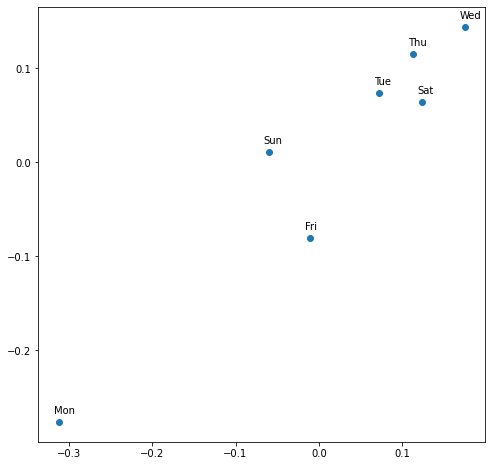

In [ ]:
model.load_weights('bestmodel.hdf5')
plot_embed('DayOfWeek_Embed', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(12, 2)


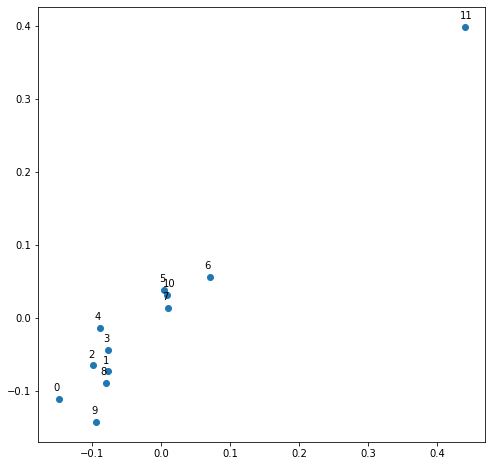

In [ ]:
plot_embed('Month_Embed', list(range(12)))

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
day_of_week_embedding.shape

In [ ]:
tsne = TSNE(n_components=2, random_state=1, learning_rate=10, n_iter=10000)
Y = tsne.fit_transform(day_of_week_embedding)
names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

In [ ]:
cat_vars

### Store embeddings

In [ ]:
submodel = Model(cat_var_inputs + cont_vars_inputs, merged)

In [ ]:
submodel.summary()

In [ ]:
submodel.save('embeddings_model.hdf5')

#Modificaciones y pruebas

Una vez explicado el modelo se prosiguió a entrenarlo con diversas variaciones y parámetros. Estas son las modificaciones que se realizaron. Los modelos entrenados pueden observarse en las notebooks Prueba 1 y Prueba 2.

Se encuentran entrenados en las sección de full model dentro de la notebook Prueba 1.

* Como detallamos en la sección de normalización, al hacer un StandardScaler la variable booleana tomaba otros valores que no fuera 0 y 1, debido a que consideramos a la mmisma una variable categorica realizamos una prueba con estas variables dentro del tratamiento de Embedding.







Se realizó la **primera prueba** con solo 'Sales' como output.



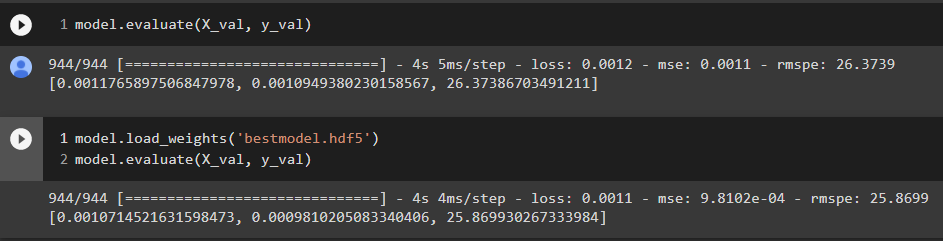

El mismo modelo poseía early stopping guardando los pesos del mejor modelo en cuanto a la loss cuando solo se tenía como output = 'Sales'. Además dentro del modelo definido se le agregaba regularización L2 con un lambda = 1e-3.

En Prueba 2 se realizó una prueba solo con 'Sales' variando el learning rate para ver el efecto sobre el rendimiento de la red.

Se alcanzó el mejor modelo en el epoch 24#

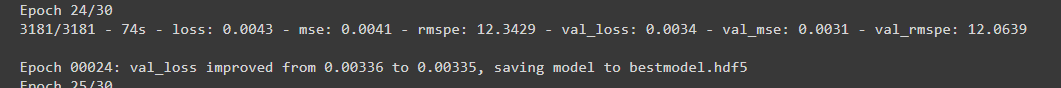

Sin embargo, dio una loss mayor al learning rate menor. Es decir que la tasa de aprendzaje es muy grande como para encontrar el mínimo a través del modelo. Volvemos al valor inicial de learning rate.

La **segunda prueba** se realizó el mismo modelo con 'Customers' y 'Sales' como output. Se lo considera un tipo de regularización debido a que los pesos se restringirán al intentar ajustarse a los dos outputs. Descartando la predicción sobre customers y quedandonos solo con 'Sales'. Los métodos de regularización previamente mencionados se mantuvieron también.
En este caso el early stopping se realizó con la métrica de 'Sales' mse.

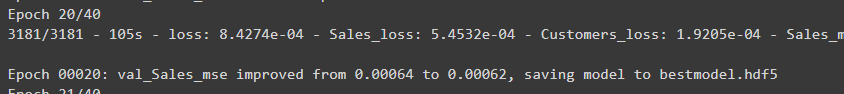

Dentro de este modelo la mejor métrica alcanzada fue en la epoch 20, en la que el early stopping identificó el mejor modelo. Cuyas métricas de validación de ' Sales' resultaron:  


val_Sales_mse: 8.2408e-04 


val_Sales_rmspe: 0.1932


Ambos valores menores al del caso anterior.

En la **tercera prueba**, realizamos el modelo y redujimos la cantidad de variables como input, realizando un análisis a partir de los gráficos en la sección de 'Selección de Variables'. Mantuvimos la regularización tal como en las pruebas anteriores, manteniendo como output 'Sales' y 'Customers'.

Los mejores valores se alcanzaron en el epoch 21.

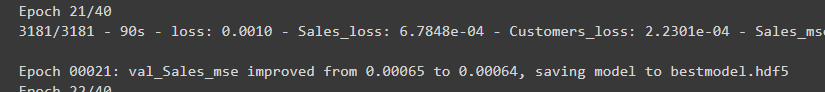







Resultados en validación de esta prueba🇰

val_loss: 9.5270e-04 

val_Sales_loss: 6.3878e-04

val_Sales_mse: 6.3878e-04 

val_Sales_rmspe: 0.1466

Se realizó un submit a la competencia en kaggle que dio el siguiente resultado.

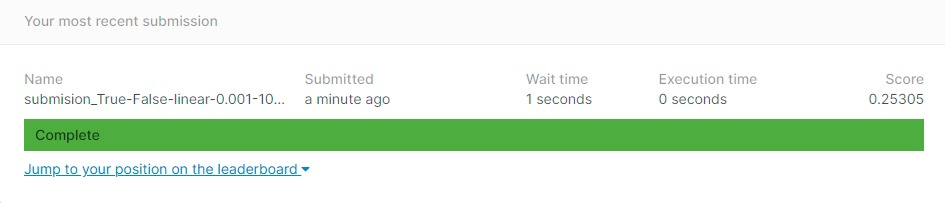